In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436590

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436590

In [9]:
model = keras.models.load_model('modelos/modeloGeneral/bidirectional_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436590

13644/13644 [==============================] - 80s 6ms/step


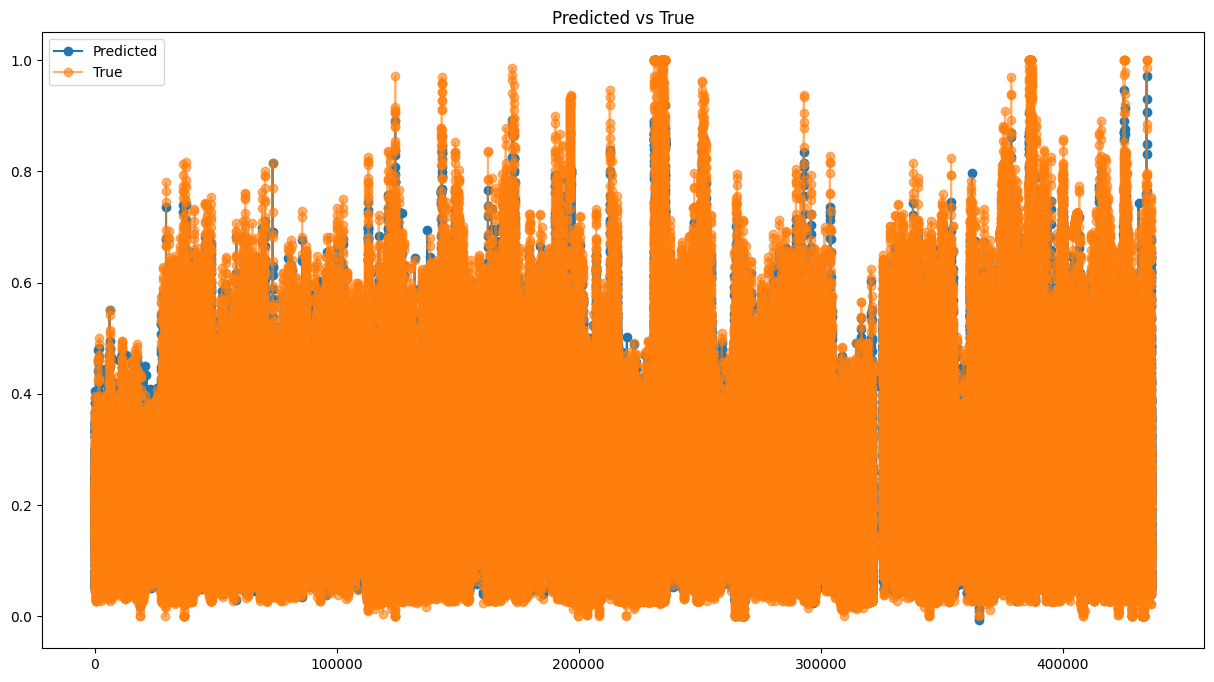

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.028398001267668952,
 'mse': 0.040878217742453565,
 'rmse': 0.0016710286857994456}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          149.230515
1          147.385605
2          143.884323
3          144.214417
4          144.752350
...               ...
436585      86.875900
436586     141.688049
436587     169.097321
436588     217.629364
436589     202.230621

[436590 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436585          137.0
436586          177.0
436587          198.0
436588          216.0
436589          233.0

[436590 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  149.230515
2023-01-01 00:15:00   140.0  147.385605
2023-01-01 00:30:00   139.0  143.884323
2023-01-01 00:45:00   145.0  144.214417
2023-01-01 01:00:00   159.0  144.752350
...                     ...         ...
2035-06-14 18:15:00   137.0   86.875900
2035-06-14 18:30:00   177.0  141.688049
2035-06-14 18:45:00   198.0  169.097321
2035-06-14 19:00:00   216.0  217.629364
2035-06-14 19:15:00   233.0  202.230621

[436590 rows x 2 columns]

AP, BE, EP: (0.9231565614342093, 0.0591265469354473, 0.01771689163034341)


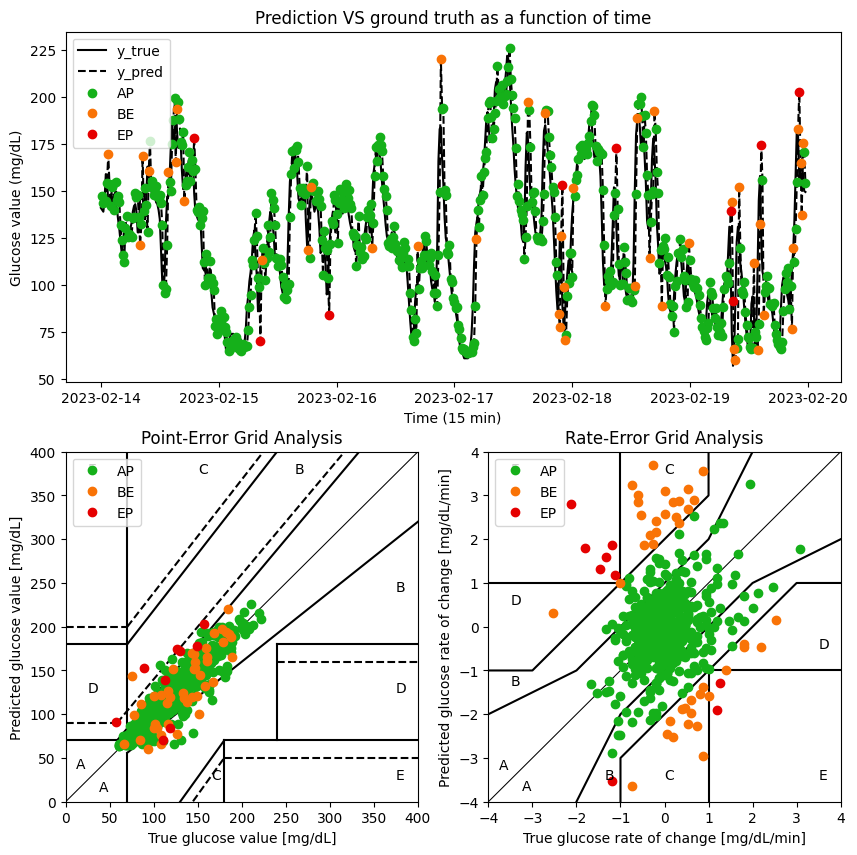

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-14 00:00:00   141.0  149.230515       NaN       NaN    NaN   
1      2023-02-14 00:15:00   140.0  147.385605 -0.066667 -0.122994     AP   
2      2023-02-14 00:30:00   139.0  143.884323 -0.066667 -0.233419     AP   
3      2023-02-14 00:45:00   145.0  144.214417  0.400000  0.022006     AP   
4      2023-02-14 01:00:00   159.0  144.752350  0.933333  0.035862     AP   
...                    ...     ...         ...       ...       ...    ...   
436585 2035-07-28 18:15:00   137.0   86.875900  2.333333 -0.061341     BE   
436586 2035-07-28 18:30:00   177.0  141.688049  2.666667  3.654143     AP   
436587 2035-07-28 18:45:00   198.0  169.097321  1.400000  1.827285     AP   
436588 2035-07-28 19:00:00   216.0  217.629364  1.200000  3.235470     AP   
436589 2035-07-28 19:15:00   233.0  202.230621  1.133333 -1.026583     EP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     A  
...      ...   ...  
436585     B    lD  
436586     A     A  
436587     A     A  
436588     A     B  
436589     A    lE  

[436590 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 43ms/step


Glucose level Predict  Glucose level True
0               0.237458            0.219565
1               0.233447            0.217391

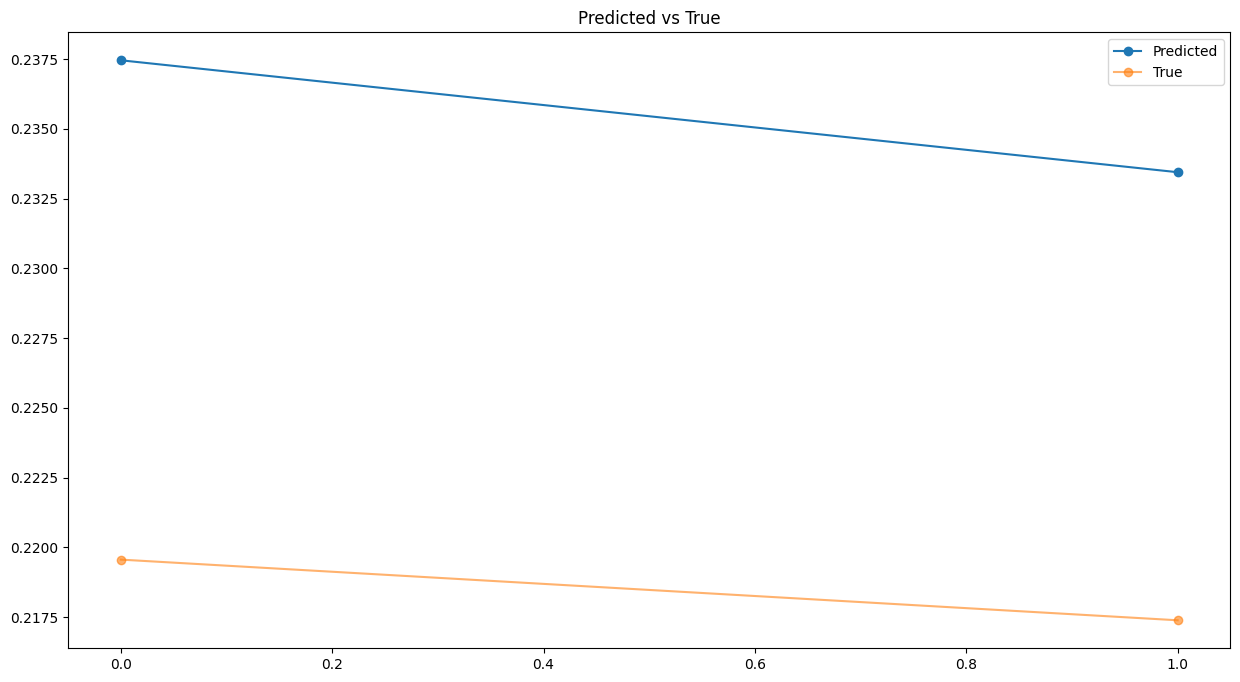

{'mae': 0.016974018578943983,
 'mse': 0.016998845033896225,
 'rmse': 0.00028896073248641836}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             149.230499               141.0
1             147.385590               140.0

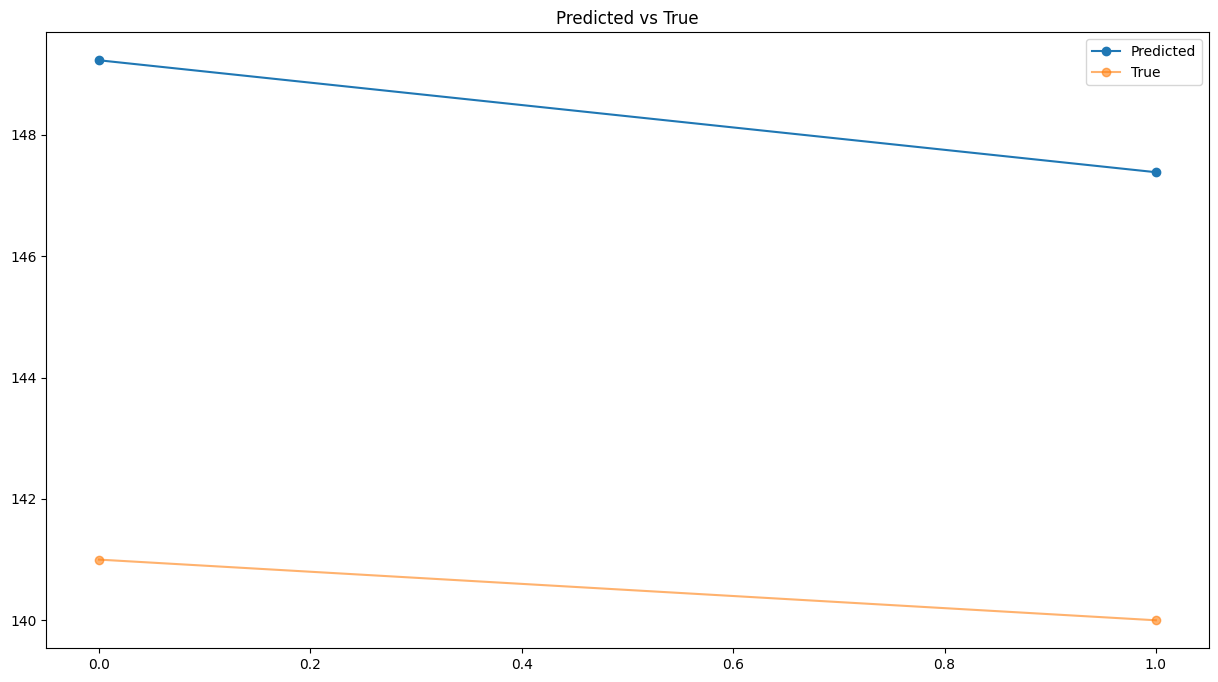

{'mae': 7.80804443359375, 'mse': 7.819464557355006, 'rmse': 61.14402596373111}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 26ms/step


Glucose level Predict  Glucose level True
0               0.237458            0.219565
1               0.256853            0.217391

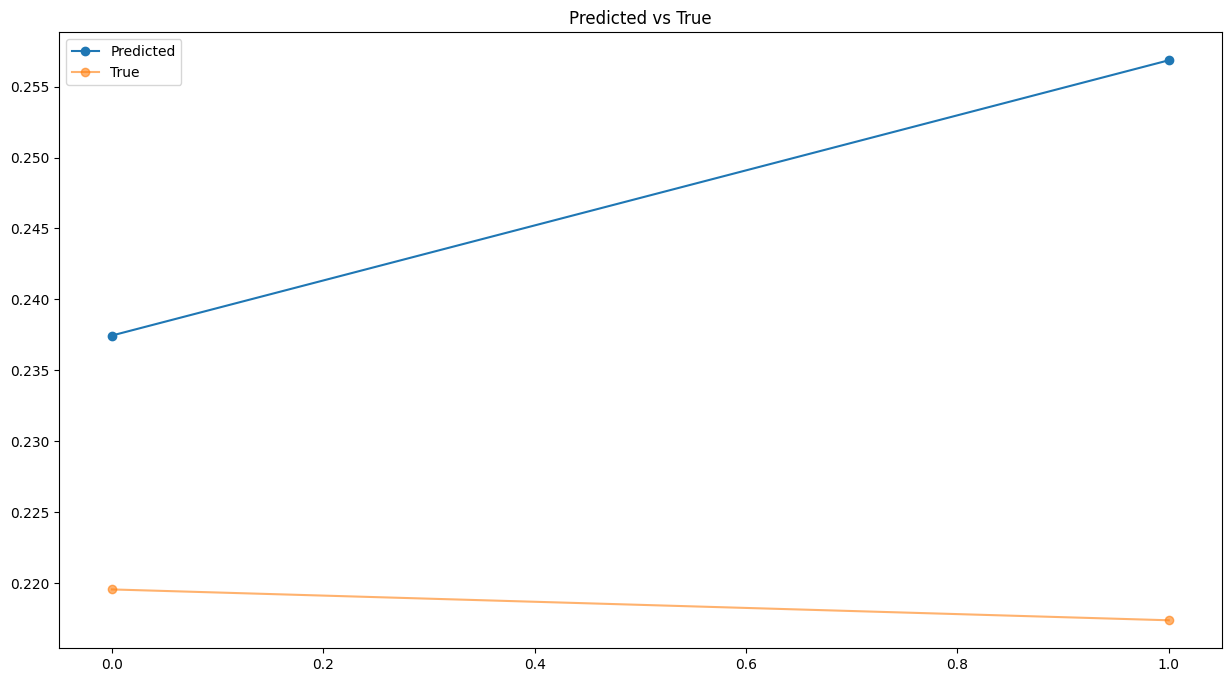

{'mae': 0.028676831787047163,
 'mse': 0.030637634286159746,
 'rmse': 0.0009386646346524713}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             149.230499               141.0
1             158.152191               140.0

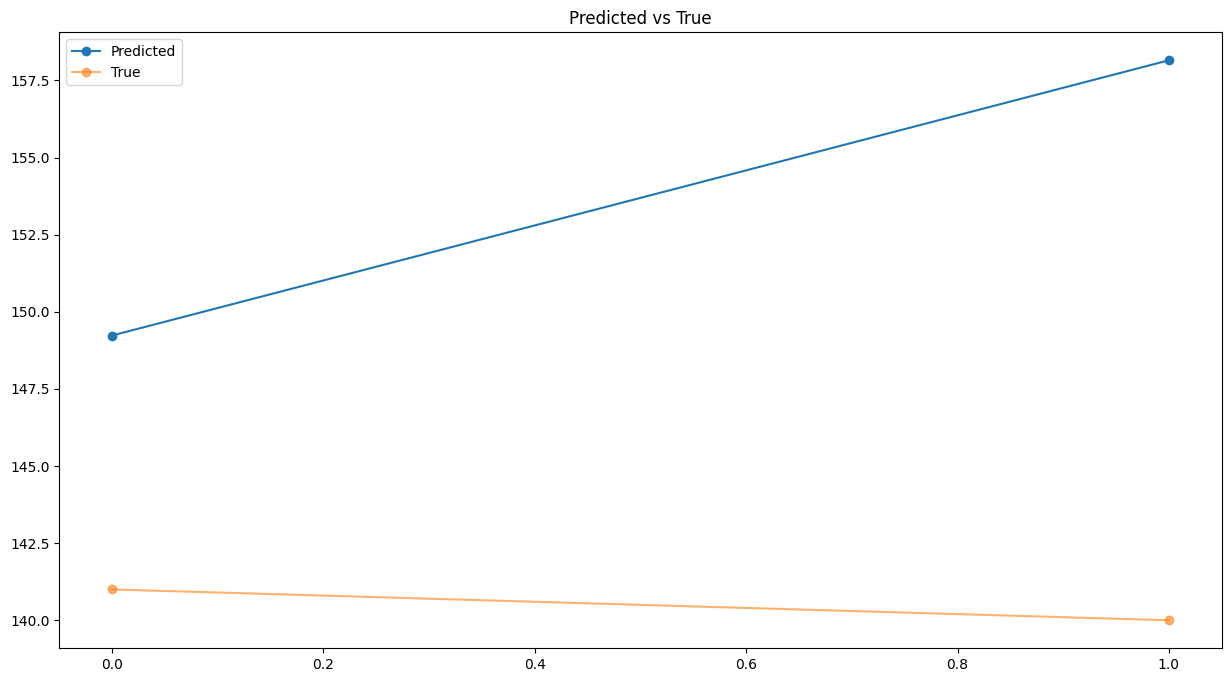

{'mae': 13.19134521484375,
 'mse': 14.093316894531354,
 'rmse': 198.62158108968288}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 5ms/step


Glucose level Predict  Glucose level True
0               0.271079            0.182609
1               0.231224            0.154348
2               0.137091            0.152174
3               0.148915            0.150000
4               0.156261            0.123913

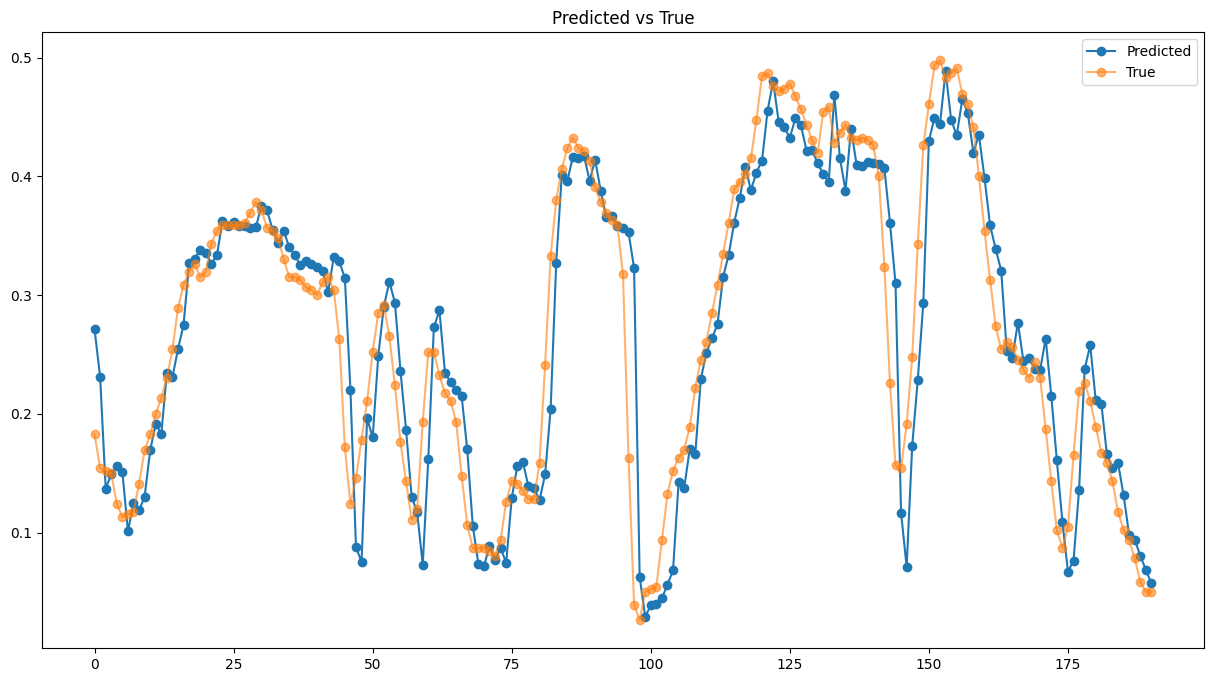

{'mae': 0.03516492638851445,
 'mse': 0.051523845400699056,
 'rmse': 0.0026547066448751374}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

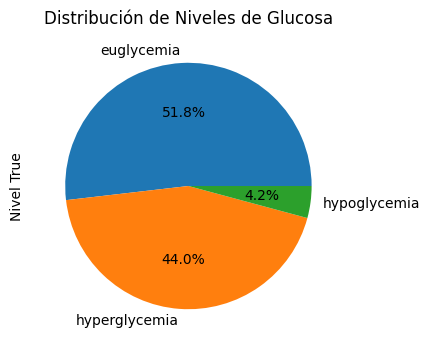

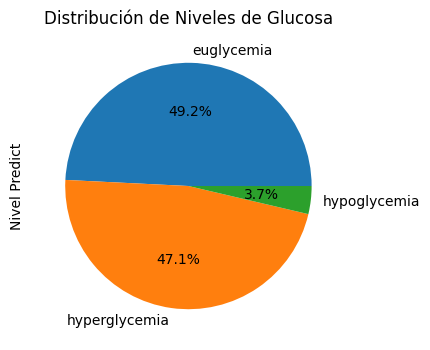

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             164.696350    euglycemia
1               111.0  euglycemia             146.362839    euglycemia
2               110.0  euglycemia             103.061775    euglycemia
3               109.0  euglycemia             108.501076    euglycemia
4                97.0  euglycemia             111.879944    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


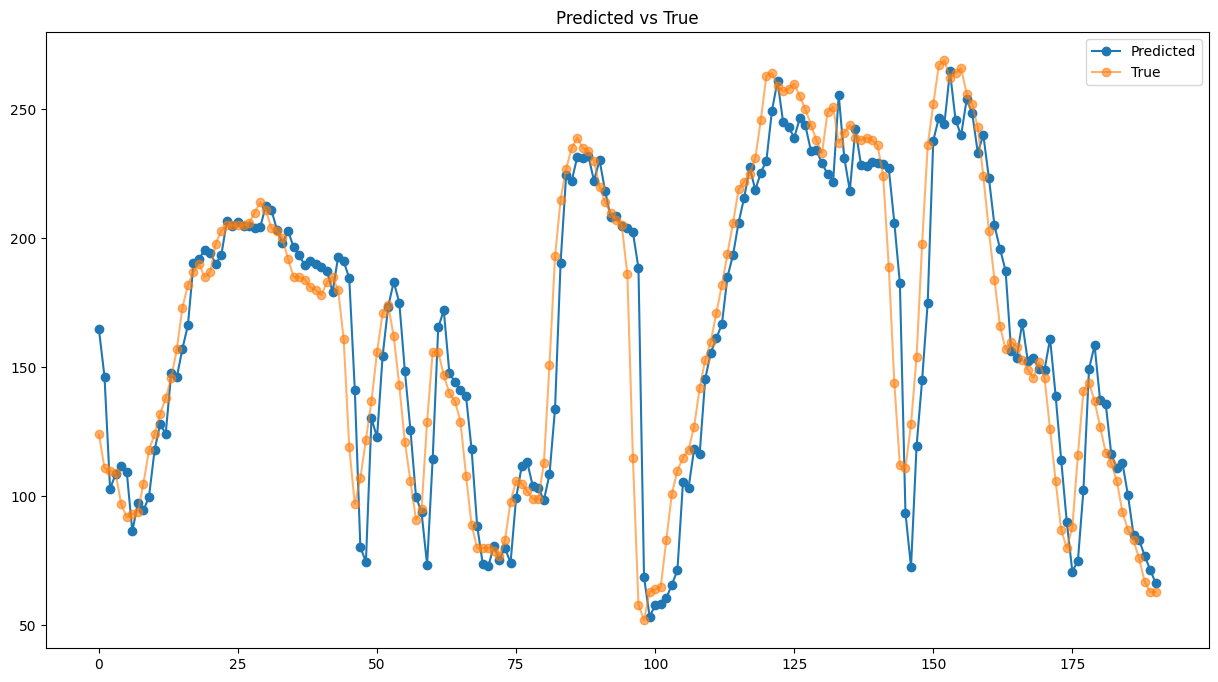

{'mae': 16.175866651285382,
 'mse': 23.700969769013273,
 'rmse': 561.735967991681}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  164.696350
2023-01-01 00:15:00   111.0  146.362839
2023-01-01 00:30:00   110.0  103.061775
2023-01-01 00:45:00   109.0  108.501076
2023-01-01 01:00:00    97.0  111.879944
...                     ...         ...
2023-01-02 22:30:00    83.0   85.153519
2023-01-02 22:45:00    76.0   83.277611
2023-01-02 23:00:00    67.0   77.025429
2023-01-02 23:15:00    63.0   71.562515
2023-01-02 23:30:00    63.0   66.313713

[191 rows x 2 columns]

AP, BE, EP: (0.9157894736842105, 0.06842105263157895, 0.015789473684210527)


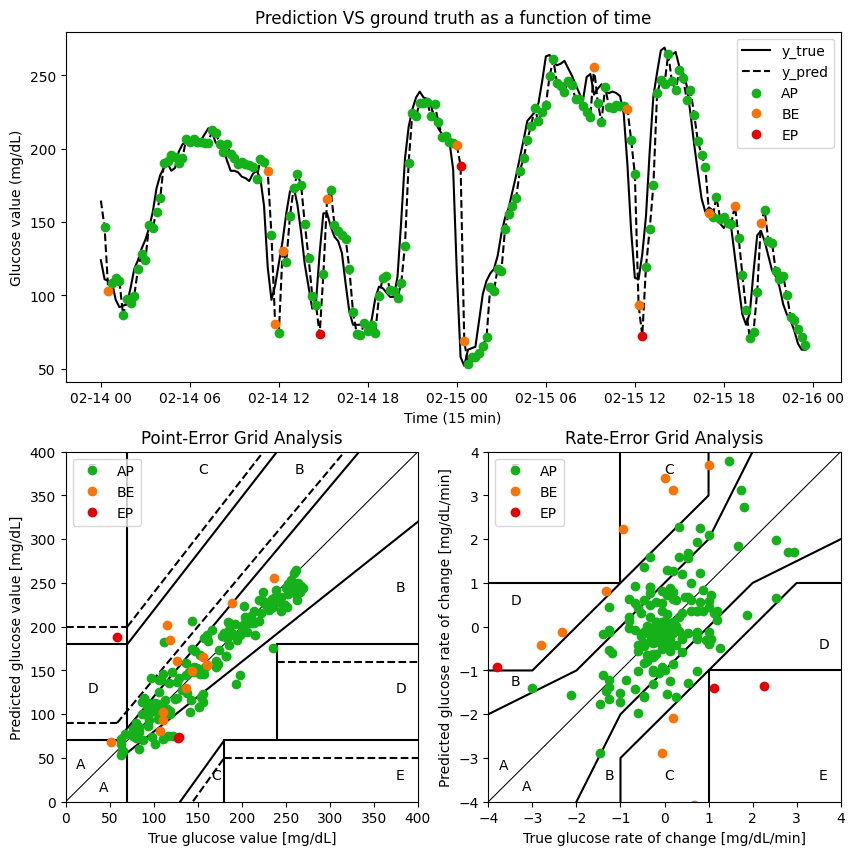

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 0s 6ms/step


Glucose level Predict  Glucose level True
0               0.334917            0.373913
1               0.370853            0.400000
2               0.383948            0.404348
3               0.413652            0.406522
4               0.383832            0.397826

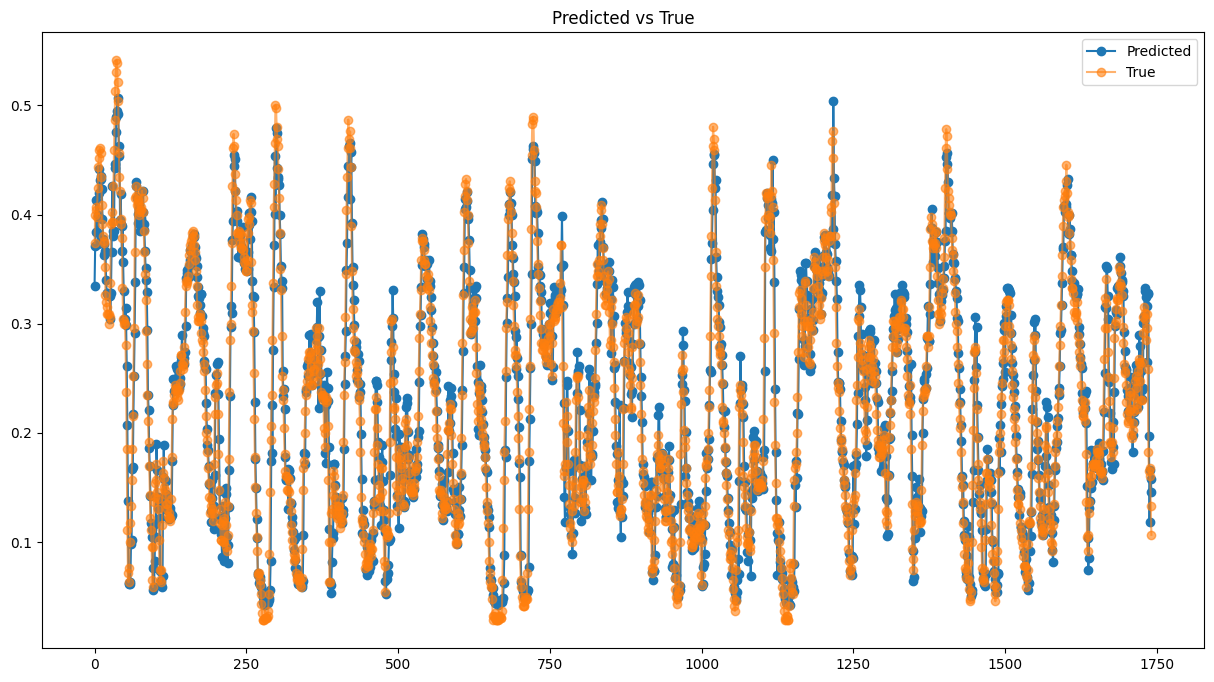

{'mae': 0.022594392871189323,
 'mse': 0.03003156508514597,
 'rmse': 0.0009018949014633585}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

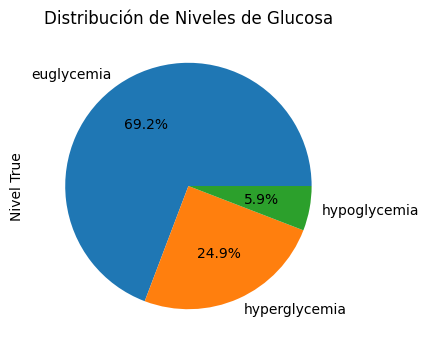

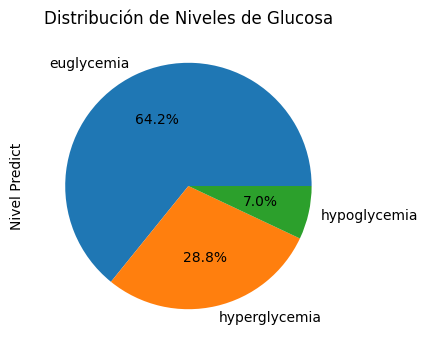

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             194.061752  hyperglycemia
1               224.0  hyperglycemia             210.592361  hyperglycemia
2               226.0  hyperglycemia             216.616211  hyperglycemia
3               227.0  hyperglycemia             230.279724  hyperglycemia
4               223.0  hyperglycemia             216.562912  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


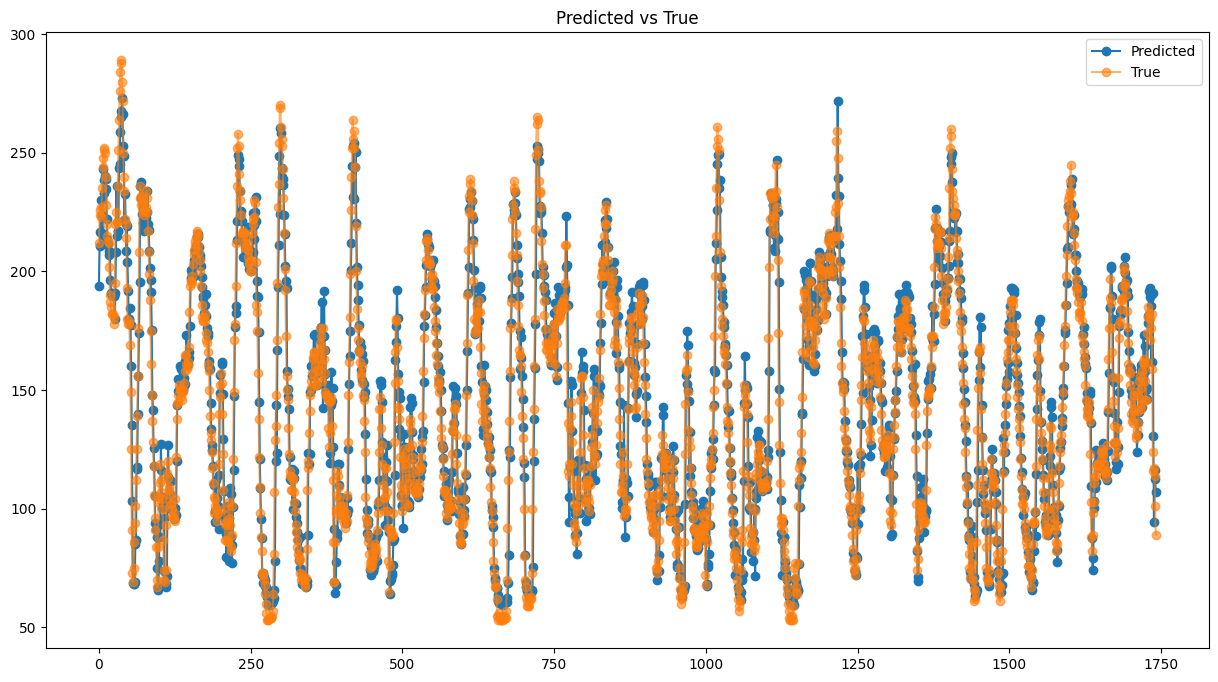

{'mae': 10.393421144189846,
 'mse': 13.814520515232907,
 'rmse': 190.84097706579084}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  194.061752
2023-01-01 00:15:00   224.0  210.592361
2023-01-01 00:30:00   226.0  216.616211
2023-01-01 00:45:00   227.0  230.279724
2023-01-01 01:00:00   223.0  216.562912
...                     ...         ...
2023-01-19 02:15:00   116.0  130.547653
2023-01-19 02:30:00   117.0   94.577187
2023-01-19 02:45:00   114.0  116.476440
2023-01-19 03:00:00   101.0  112.584183
2023-01-19 03:15:00    89.0  106.927269

[1742 rows x 2 columns]

AP, BE, EP: (0.9666858127512924, 0.026421596783457783, 0.0068925904652498565)


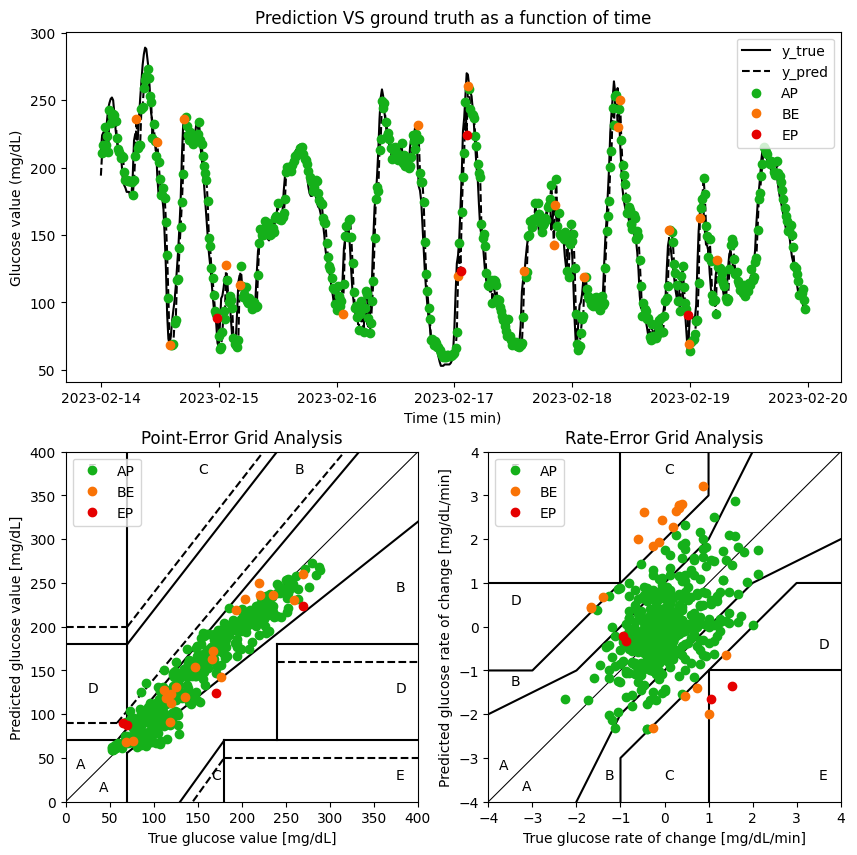

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 7ms/step


Glucose level Predict  Glucose level True
0               0.325886            0.261858
1               0.276015            0.229051
2               0.235090            0.196245
3               0.211328            0.163439
4               0.161105            0.130632

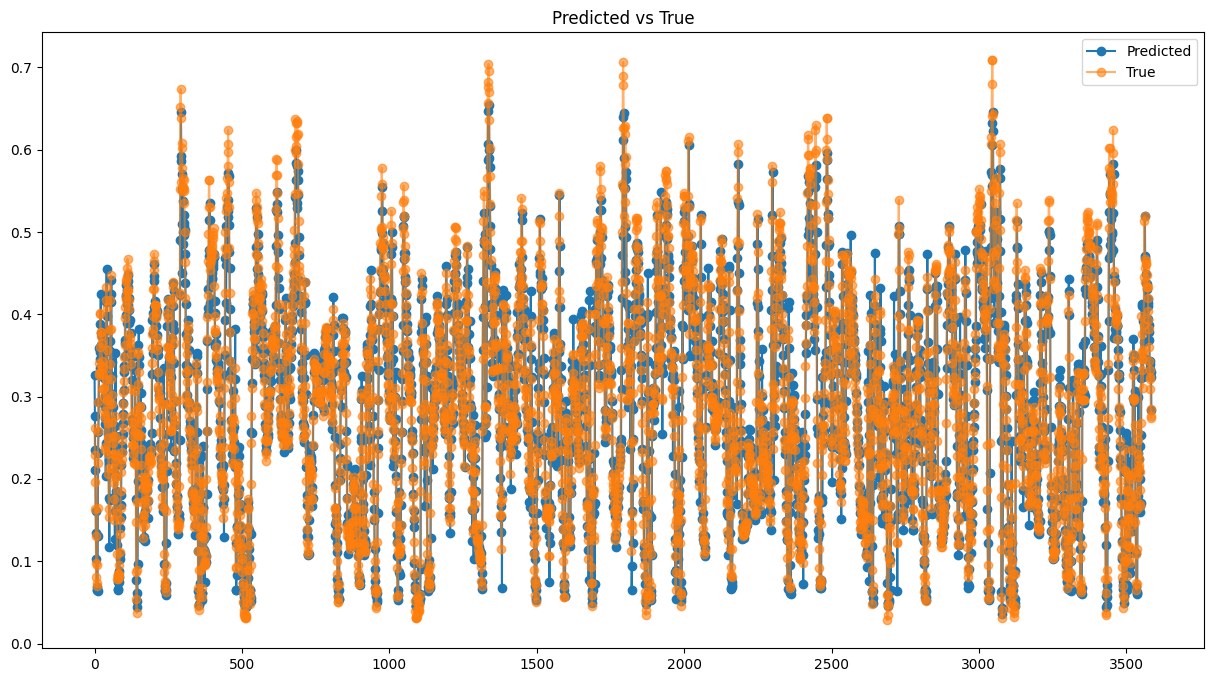

{'mae': 0.03575072192062006,
 'mse': 0.04972010678851249,
 'rmse': 0.002472089019061086}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

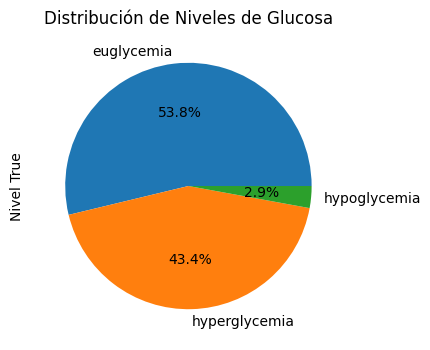

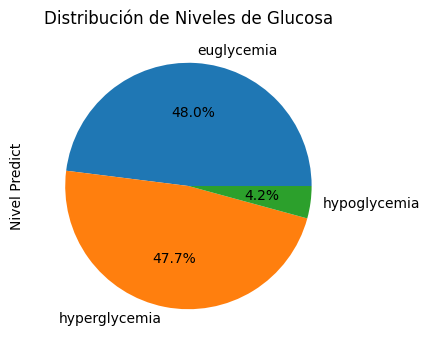

Glucose level True  Nivel True  Glucose level Predict  Nivel Predict
0          160.454545  euglycemia             189.907715  hyperglycemia
1          145.363636  euglycemia             166.966766     euglycemia
2          130.272727  euglycemia             148.141418     euglycemia
3          115.181818  euglycemia             137.210999     euglycemia
4          100.090909  euglycemia             114.108139     euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


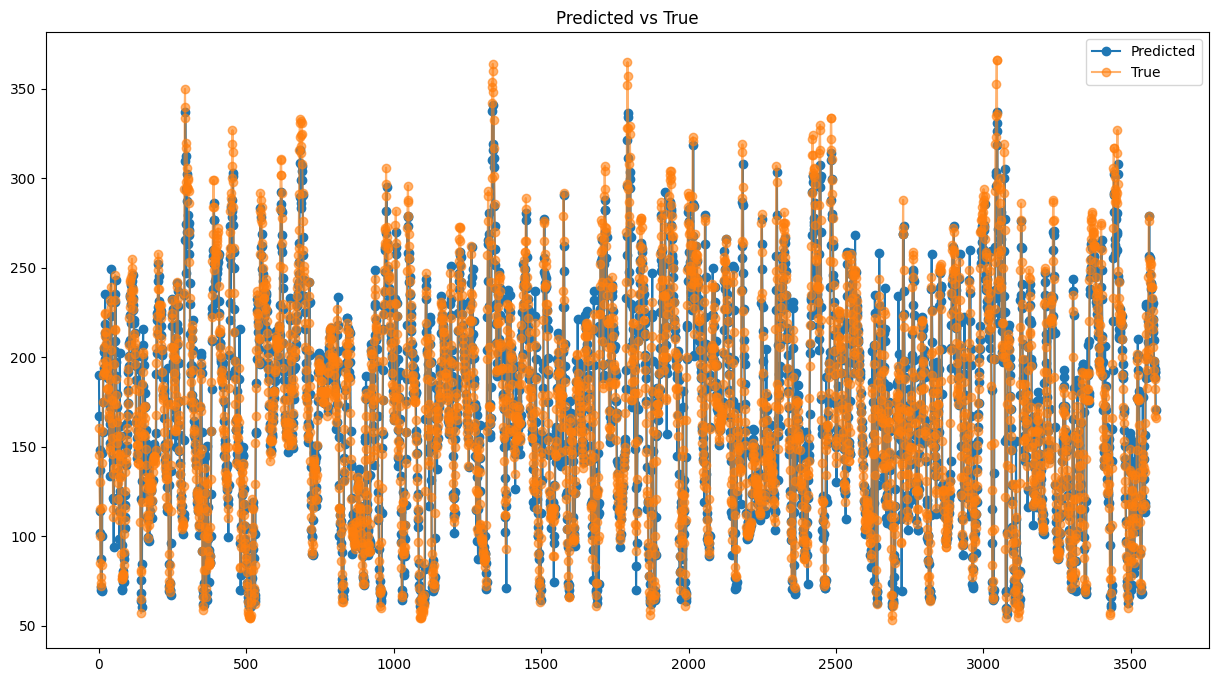

{'mae': 16.445333304590925,
 'mse': 22.871250198389202,
 'rmse': 523.0940856373181}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  189.907715
2023-01-01 00:15:00  145.363636  166.966766
2023-01-01 00:30:00  130.272727  148.141418
2023-01-01 00:45:00  115.181818  137.210999
2023-01-01 01:00:00  100.090909  114.108139
...                         ...         ...
2023-02-07 07:15:00  188.000000  193.632248
2023-02-07 07:30:00  182.000000  191.999207
2023-02-07 07:45:00  171.000000  191.538422
2023-02-07 08:00:00  167.000000  188.737946
2023-02-07 08:15:00  166.000000  170.394882

[3586 rows x 2 columns]

AP, BE, EP: (0.8853556485355648, 0.08368200836820083, 0.03096234309623431)


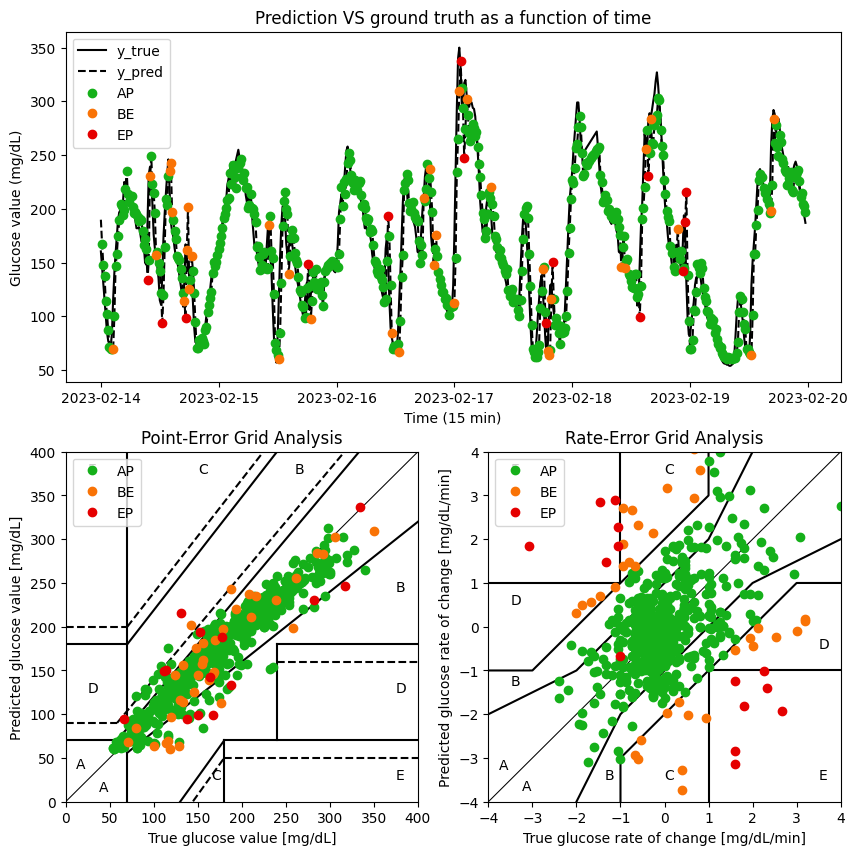

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 1s 6ms/step


Glucose level Predict  Glucose level True
0               0.490232            0.534783
1               0.501352            0.500000
2               0.483528            0.484783
3               0.427622            0.463043
4               0.447184            0.428261

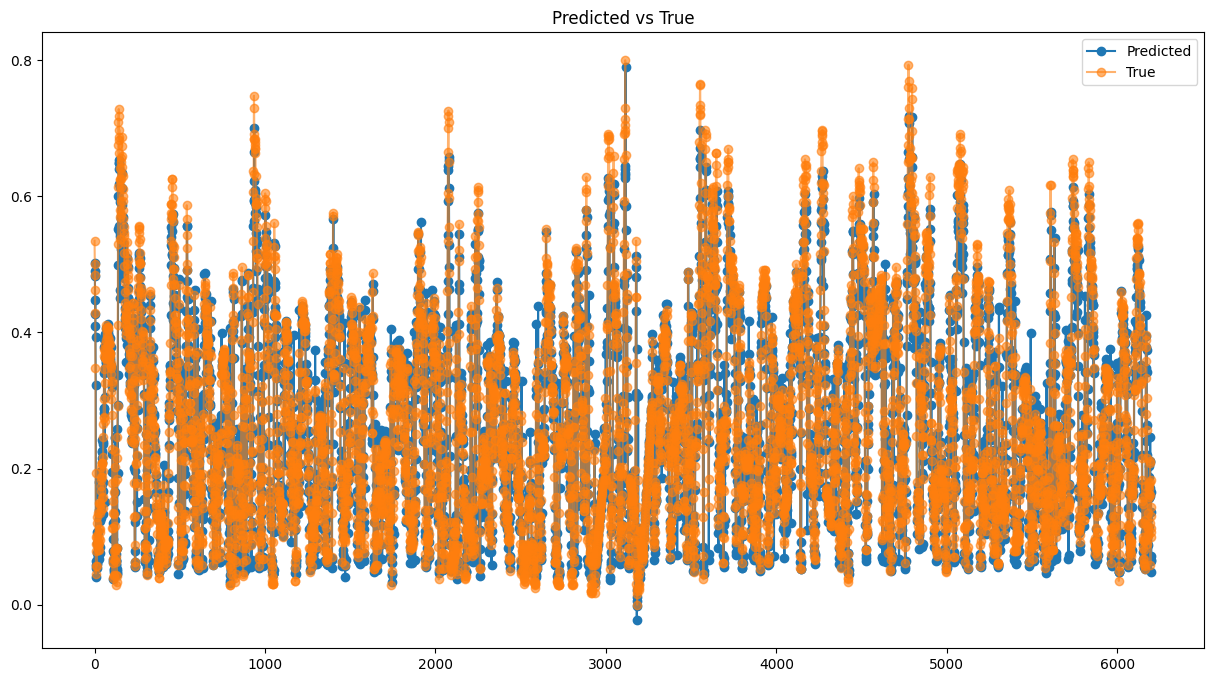

{'mae': 0.04000771300020579,
 'mse': 0.05623624111014498,
 'rmse': 0.0031625148141983606}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

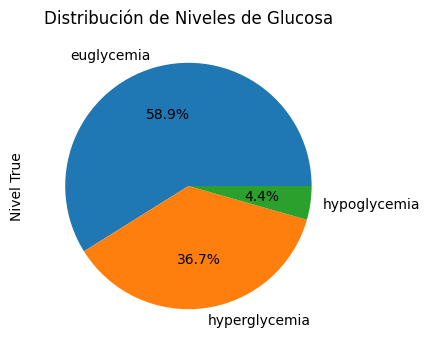

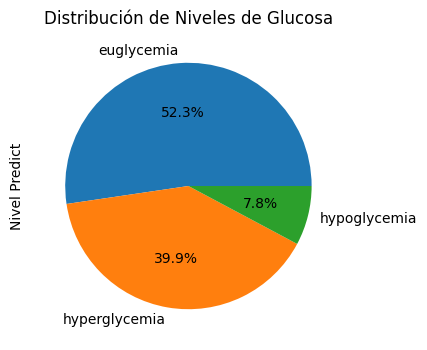

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             265.506866  hyperglycemia
1               270.0  hyperglycemia             270.622040  hyperglycemia
2               263.0  hyperglycemia             262.423004  hyperglycemia
3               253.0  hyperglycemia             236.705948  hyperglycemia
4               237.0  hyperglycemia             245.704590  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


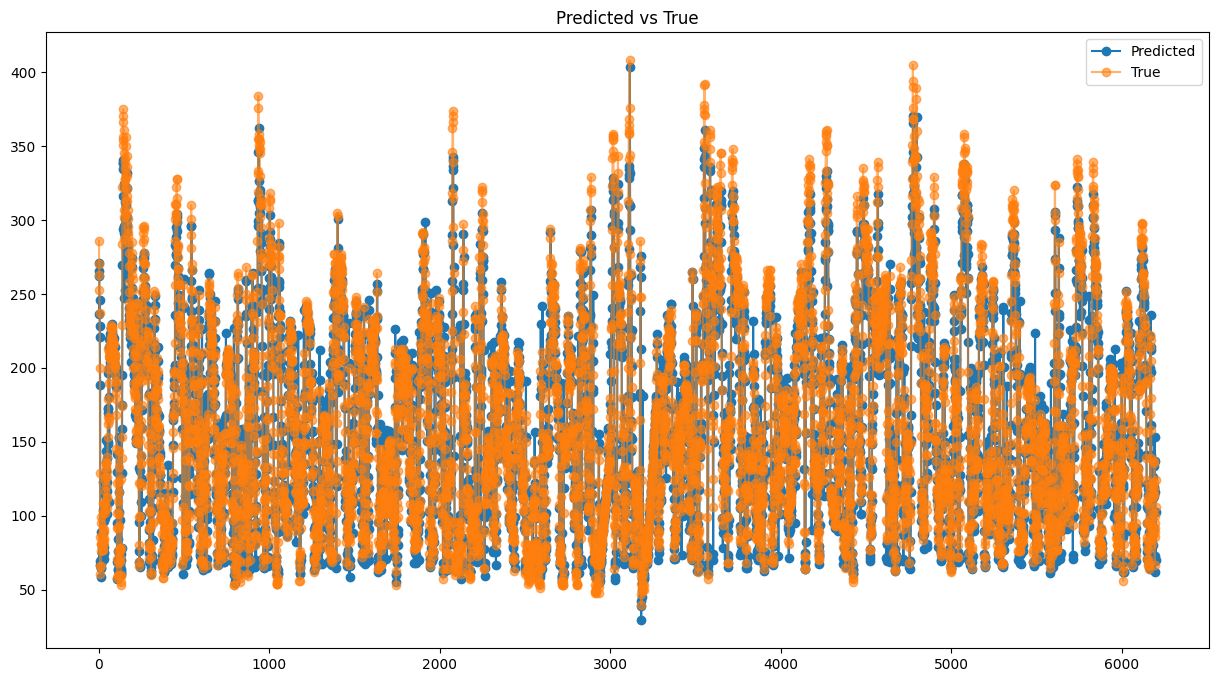

{'mae': 18.40354923912623, 'mse': 25.86867228105384, 'rmse': 669.1882055845633}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  265.506866
2023-01-01 00:15:00   270.0  270.622040
2023-01-01 00:30:00   263.0  262.423004
2023-01-01 00:45:00   253.0  236.705948
2023-01-01 01:00:00   237.0  245.704590
...                     ...         ...
2023-03-06 13:00:00   100.0   62.213917
2023-03-06 13:15:00    89.0  116.355019
2023-03-06 13:30:00    92.0   72.887260
2023-03-06 13:45:00   106.0   69.877983
2023-03-06 14:00:00   124.0  102.566811

[6201 rows x 2 columns]

AP, BE, EP: (0.85, 0.10838709677419354, 0.04161290322580645)


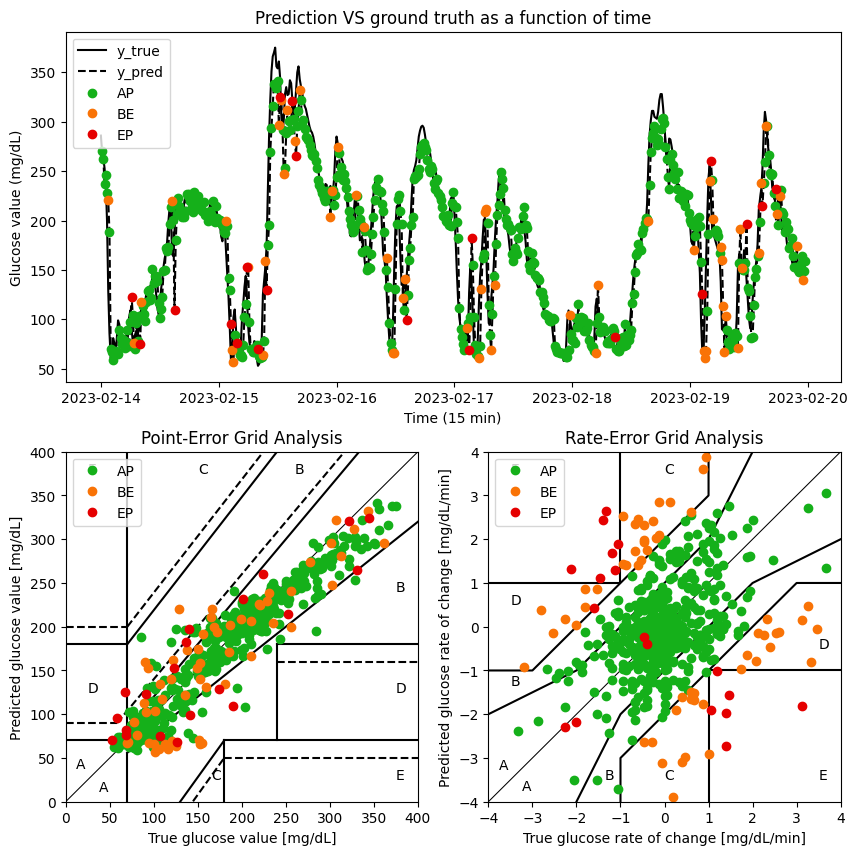

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)